# Plotting Live JSON-retrieved Data

#### This example uses the matplotlib toolkit extension called basemap.  It acquires data remotely using the 3rd party tool called requests and uses the json_normalize() function to read the json data within the 'markers' property into a DataFrame.  Latitude and longitude values are extracted and plotted using a Basemap object which is given a background image using the readshapefile() method.

Note: You must _pip install basemap_ for this to work.  Windows users may find this a bit difficult and might choose to install an already compiled binary from here:
(http://www.lfd.uci.edu/~gohlke/pythonlibs/).

Also the requests module must be installed using _pip install requests_.


In [21]:
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import requests

%matplotlib inline

In [22]:
url = 'http://inciweb.nwcg.gov/feeds/json/markers/'

The code below creates a Basemap with the longitude set in the lower-left corner (llcrnrlon) and the latitude set in the lower-left corner (llcrnrlat) to the values shown.  Upper-right corner values are also established.  The map is created by reading the shape file (st99_d00)

In [23]:
statemap = Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,
        projection='lcc',lat_1=32,lat_2=45,lon_0=-95)

Retrieve the live fire data...

In [24]:
data = requests.get(url).json()                     

Use json_normalize() because the retrieved JSON data is not in a compatible format with read_json()

In [25]:
df = json_normalize(data['markers'])

Extract one fow of data at a time, which in this case is returned as a namedtuple (when using itertuples().  This row will contain a lng and lat attribute that may now be used for a plot against our map.

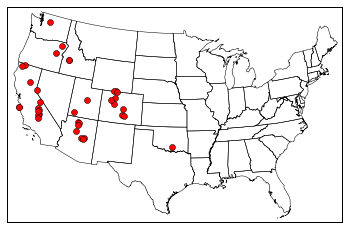

In [26]:
statemap.readshapefile('../resources/shapes/st99_d00', name='statemap', drawbounds=True)
for row in df.itertuples():                         
    x, y = statemap(row.lng, row.lat)               # translate lat, lng into coords for a matplotlib plot
    statemap.plot(x, y, marker='o', color='Red')    # plot the points
plt.show()

Changing the lower-left and upper-right latitude and longitude values allows us to zoom in on items...

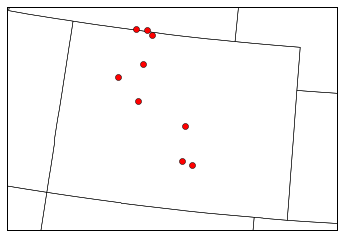

In [27]:
statemap2 = Basemap(llcrnrlon=-110,llcrnrlat=36,urcrnrlon=-101,urcrnrlat=42,
                    projection='lcc',lat_1=32,lat_2=45,lon_0=-95)
statemap2.readshapefile('../resources/shapes/st99_d00', name='statemap', drawbounds=True)
for row in df.itertuples():                         
    x, y = statemap2(row.lng, row.lat)               
    statemap2.plot(x, y, marker='o', color='Red')
plt.show()